In [1]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import pickle
import pandas as pd
import anndata
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adatae=sc.read('../scRNA_paga/state_adata/MARSseq_equilibrate.h5ad')
adatam=sc.read('../scRNA_paga/state_adata/MARSseq_minimize.h5ad')

In [3]:
cell_affinity=list()
for i in range(len(adatam.uns['nsbm']['cell_affinity']['2'])):
    val=dict()
    cell=[]
    for j in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
        buff=[x for x in adatam.uns['nsbm']['cell_affinity']['2'][i]]
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]== max(adatam.uns['nsbm']['cell_affinity']['2'][i]):
            val[j]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][j])
            buff.pop(j)
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]<0.95:
            for e in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
                if adatam.uns['nsbm']['cell_affinity']['2'][i][e]== max(buff):
                    val[e]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][e])        
    cell.append(val)   
    cell_affinity.append(cell)

In [4]:
cell_affinity

[[{0: 0.999999999996517}],
 [{1: 0.9999999997974658}],
 [{1: 0.8688170665460273, 2: 0.08045729749925042}],
 [{2: 0.9999999999999301}],
 [{2: 1.0}],
 [{0: 0.9999362395044056}],
 [{0: 0.9972806327104035}],
 [{3: 1.0}],
 [{0: 0.6230120159346142, 2: 0.3769542766427215}],
 [{2: 0.9999995935872276}],
 [{2: 0.9965879909125567}],
 [{2: 0.999999999992389}],
 [{2: 0.9999999999987252}],
 [{0: 0.999999999999999}],
 [{4: 0.9989244128195033}],
 [{0: 0.9999999605551897}],
 [{2: 0.9999999999601779}],
 [{2: 0.9999999981111805}],
 [{0: 0.9994525176683201}],
 [{2: 0.9999898662559955}],
 [{4: 0.9999973350192415}],
 [{3: 0.9999982178530805}],
 [{0: 0.9999999999945838}],
 [{3: 0.999999902236611}],
 [{4: 0.9999999994192748}],
 [{0: 0.999936055559615}],
 [{2: 0.99999999154529}],
 [{2: 0.9999991382321051}],
 [{3: 0.9815882170998347}],
 [{4: 0.9999999997049001}],
 [{4: 1.0}],
 [{1: 0.8866353449508616, 2: 0.08547460949576766}],
 [{1: 1.0}],
 [{2: 0.9999999999999978}],
 [{4: 0.99999999740337}],
 [{2: 0.9999997787

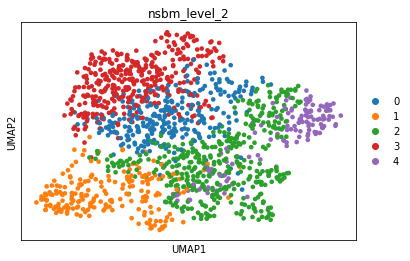

In [15]:
sc.pl.umap(adatam,color='nsbm_level_2')

In [13]:
cell_uncert=list()
for i in range(len(cell_affinity)):
    if len(cell_affinity[i][0])>1:
        cell_uncert.append(cell_affinity[i][0])

In [12]:
len(cell_affinity[8][0])

2

In [16]:
M=adatam.uns['nsbm']['cell_affinitya']['2']

In [17]:
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 

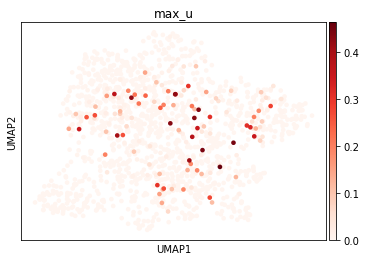

In [18]:
sc.pl.umap(adatam, color ='max_u',color_map='Reds')

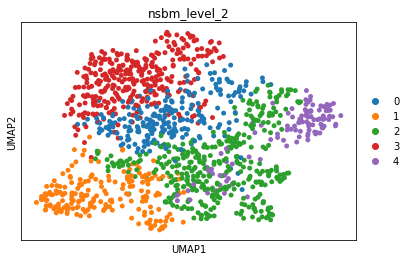

In [32]:
sc.pl.umap(adatam[adatam.obs.max_u < 0.005], color='nsbm_level_2')

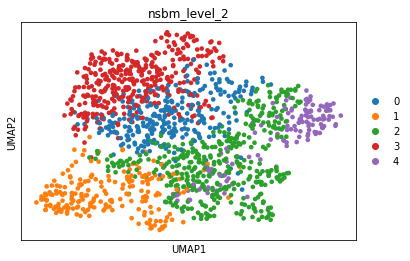

In [21]:
sc.pl.umap(adatam,color='nsbm_level_2')

Trying to set attribute `.uns` of view, copying.


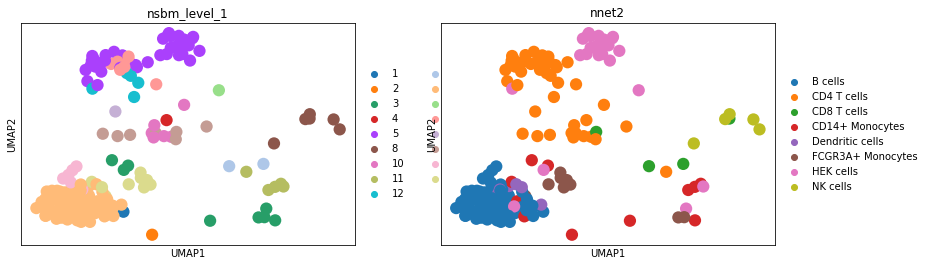

In [42]:
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_1','nnet2'])